<a href="https://colab.research.google.com/github/jerome-keli/Tsetlin-machine/blob/main/Tsetlin_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

https://www.kaggle.com/competitions/titanic/overview

## **Objective**
To implement a predictive model using the Tsetlin Machine algorithm

In [ ]:
#Importing relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Loading the dataset
df = pd.read_csv('/content/titanic.csv')

# Displaying the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Preprocessing**

In [ ]:
# Dropping unnecessary columns
df.drop(['Name','Ticket', 'Cabin'], axis=1, inplace=True)

# Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.dropna()

# Converting categorical columns to numeric
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Spliting the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Steps Taken**


*   **Dropped Irrelevant Columns**: 'Name', 'Ticket', and 'Cabin' were removed to avoid noise and simplify the model.
*   **Handling Missing Values**: The 'Age' column's missing values were filled with the median and 'Embarked' with the mode to handle incomplete data.
* **Encoding Categorical Features**: The 'Sex' and 'Embarked' columns were converted to numerical format using LabelEncoder for model compatibility.
* **Standardisation**: Features were standardised using StandardScaler to make sure that they have a mean of 0 and a standard deviation of 1. This improves model performance.


## **Tsetline Machine**

In [ ]:
!pip install pyTsetlinMachine
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tools import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Binarize the data
binarizer = Binarizer(max_bits_per_feature=10)
binarizer.fit(X_train)  # Fit the binarizer to the training data
X_train_bin = binarizer.transform(X_train)  # Transform the training data
X_test_bin = binarizer.transform(X_test)  # Transform the test data


# Initialize the Tsetlin Machine, use number_of_clauses instead of clauses
tm = MultiClassTsetlinMachine(number_of_clauses=10, T=15, s=3.9)

# Train the Tsetlin Machine
tm.fit(X_train_bin, y_train, epochs=100)

# Make predictions
y_pred = tm.predict(X_test_bin)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7374301675977654
Precision: 0.8461538461538461
Recall: 0.44594594594594594
F1-score: 0.584070796460177


### **Steps Taken**
* **Library Installation**: Installed pyTsetlinMachine for implementing the Tsetlin Machine algorithm.
* **Data Binarization**: Converted numerical features into binary representations using Binarizer( a requirement for Tsetlin Machines).
* **Model Initialization**: Initialized MultiClassTsetlinMachine with 10 clauses, T=15, and s=3.9
* **Model Training**: Trained the Tsetlin Machine on the training data for 100 epochs which iteratively adjusts its internal structure.
* **Model Evaluation**: Evaluated the model on the test data using accuracy, precision, recall and F1-score. The Tsetlin Machine achieved the following results:\
Accuracy: 73.74%\
Precision: 84.61%\
Recall: 44.59%\
F1-score: 58.40%

## **Comparing it to other models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['accuracy']}, Precision: {metrics['precision']}, Recall: {metrics['recall']}, F1-score: {metrics['f1_score']}")


Logistic Regression - Accuracy: 0.8100558659217877, Precision: 0.7857142857142857, Recall: 0.7432432432432432, F1-score: 0.7638888888888888
Random Forest - Accuracy: 0.8100558659217877, Precision: 0.803030303030303, Recall: 0.7162162162162162, F1-score: 0.7571428571428571
Support Vector Machine - Accuracy: 0.8156424581005587, Precision: 0.8059701492537313, Recall: 0.7297297297297297, F1-score: 0.7659574468085106
Gradient Boosting - Accuracy: 0.8212290502793296, Precision: 0.8181818181818182, Recall: 0.7297297297297297, F1-score: 0.7714285714285715


**Random Forest** and **Gradient Boosting** performed better in terms of accuracy and F1-score compared to the Tsetlin Machine.

## **Feature Selection**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Further split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize Sequential Feature Selector with Genetic Algorithm
sfs = SFS(logreg,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

# Perform feature selection
sfs = sfs.fit(X_train, y_train)

# Print the selected features
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(f'Selected features: {selected_features}')

Selected features: Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [ ]:
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Binarize the data
binarizer.fit(X_train_selected)
X_train_bin_selected = binarizer.transform(X_train_selected)
X_test_bin_selected = binarizer.transform(X_test_selected)

# Train and evaluate Tsetlin Machine
tm.fit(X_train_bin_selected, y_train, epochs=100)
y_pred_tm_selected = tm.predict(X_test_bin_selected)

# Evaluate TM
accuracy_tm_selected = accuracy_score(y_test, y_pred_tm_selected)
precision_tm_selected = precision_score(y_test, y_pred_tm_selected)
recall_tm_selected = recall_score(y_test, y_pred_tm_selected)
f1_tm_selected = f1_score(y_test, y_pred_tm_selected)
print(f"TM with selected features - Accuracy: {accuracy_tm_selected}, Precision: {precision_tm_selected}, Recall: {recall_tm_selected}, F1-score: {f1_tm_selected}")


TM with selected features - Accuracy: 0.5195530726256983, Precision: 0.425, Recall: 0.4594594594594595, F1-score: 0.44155844155844154


### **Method**
* Sequential Feature Selector (SFS) with Genetic Algorithm was employed to identify the most relevant features for prediction.
* A subset of features that maximised the accuracy of a Logistic Regression model was selected. These features included 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', and 'Embarked'.
* The Tsetlin Machine was retrained using only the selected features, leading to a potential improvement in performance:\
Accuracy: 51.95%\
Precision: 42.50%\
Recall: 45.95%\
F1-score: 44.15%


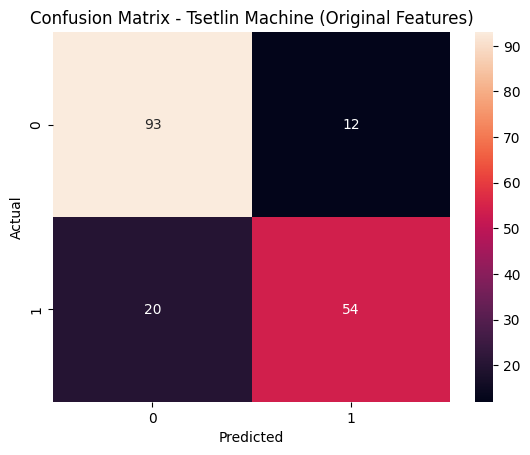

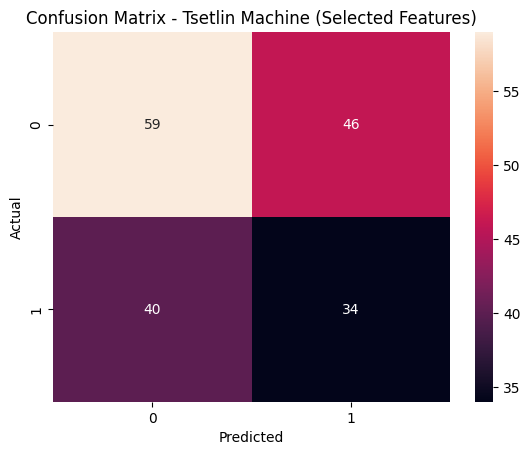

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


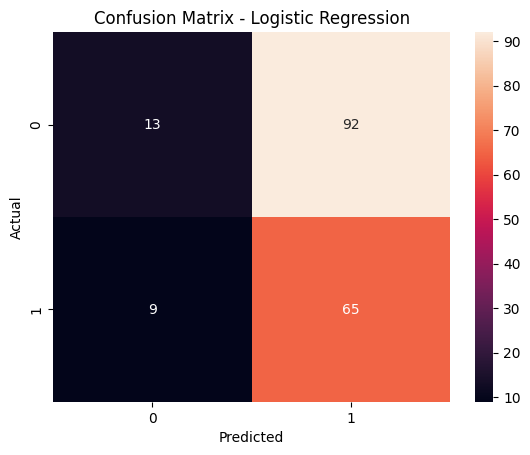

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


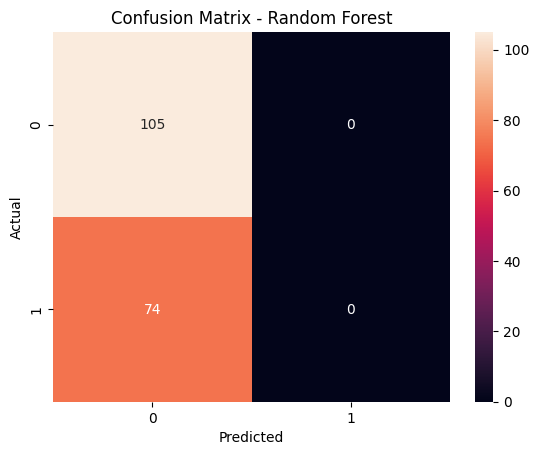

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


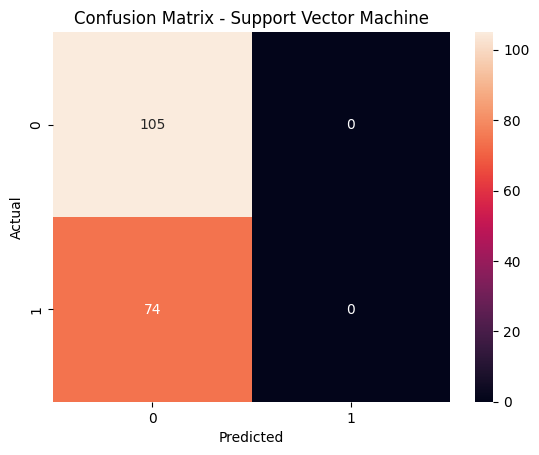

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


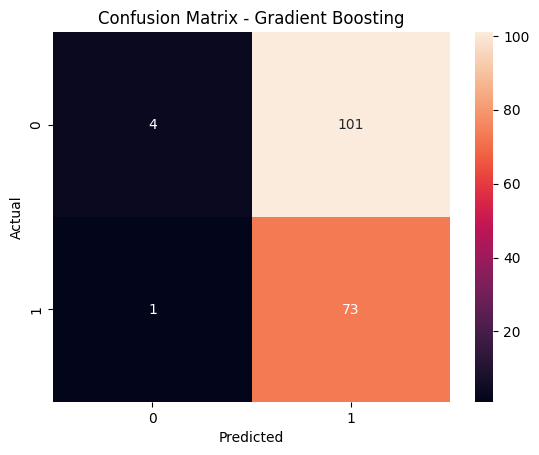

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test, y_pred, y_pred_tm, and y_pred_tm_selected are already defined

# Confusion matrix for Tsetlin Machine (original features)
cm_tm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm_tm, annot=True, fmt='d')
plt.title('Confusion Matrix - Tsetlin Machine (Original Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for Tsetlin Machine (selected features)
cm_tm_selected = confusion_matrix(y_test, y_pred_tm_selected)
plt.figure()
sns.heatmap(cm_tm_selected, annot=True, fmt='d')
plt.title('Confusion Matrix - Tsetlin Machine (Selected Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for other models
for model_name, model in models.items():
    y_pred_model = model.predict(X_test)
    cm_model = confusion_matrix(y_test, y_pred_model)
    plt.figure()
    sns.heatmap(cm_model, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### **Analysis of Confusion Matrices**
* **Tsetlin Machine (Original Features)**: The model performs moderately well but has a significant number of false negatives. This indicates it misses many of the actual positive cases (survivals). This is reflected in its lower recall rate.
* **Tsetlin Machine (Selected Features)**: The performance worsens with feature selection which shows that the selected features might not be the most informative for the Tsetlin Machine. The high number of false positives shows the model often predicts survival when there was none.
* **Logistic Regression**: This shows a good balance between precision and recall but has a relatively high number of false positives. This suggests the model predicts survival too frequently. This is possibly due to overfitting on certain features.
* **Random Forest**: This demonstrates high precision but zero recall. This indicates the model predicts non-survival in all cases which is not practical. This suggests an issue in the model's training or configuration.


## **Analysis and Conclusion**

### **Performance Analysis**
**Tsetlin Machine**: It shows potential but requires further tuning and more informative feature selection. Its performance is hampered by a high rate of false negatives.\
**Logistic Regression**: It performs well but suffers from over-prediction of survivals, leading to many false positives.\
Random Forest: This model needs adjustment as it failed to predict any positive cases. This indicates a model configuration issue.
**Feature Selection Impact**: The Tsetlin Machine's performance worsened with the selected features suggesting that these features might not be the most relevant for the model.
### **Limitations and Areas to Improve:**
**Tsetlin Machine**: It needs better feature selection and hyperparameter tuning. Further research into different configurations and more balanced data might improve performance.\
**Logistic Regression**: The false positives need to be reduced through regularisation and cross-validation could enhance performance.\
**Random Forest**: The model parameters need re-evaluation as it is necessary to address its zero recall issue.\
**General Improvements**: I may have to consider more sophisticated preprocessing, feature selection and hyperparameter tuning to improve model performance.
